## David Saavedra Fernández

## **Cuaderno demo: Panda, Numpy, MatPlotLib, funciones anónimas y carga de ficheros**

24_25


# Introducción a Numpy y Panda

Web: [Numpy](https://numpy.org/)

Web: [Pandas](https://pandas.pydata.org/)

Web: [Matplotlib](https://matplotlib.org/)

Web: [Scipy](https://scipy.org/)

Web: [Scikit-learn](https://scikit-learn.org/stable/)

In [3]:
import matplotlib
# CARGAMOS LIBRERIAS
# ==============================================================================
# Importamos la librería NUMPY para CÁLCULO NUMÉRICO Y ANÁLISIS DE DATOS
import numpy as np
# PANDAS para MANIPULACIÓN y ANÁLISIS DE DATOS
import pandas as pd
# MATPLOTLIB para GRAFICOS
import matplotlib.pyplot as plt
# SCIPY para CÁLCULO MATEMÁTICO
import scipy # necesario para conocer la versión
import scipy.stats as st
# Preprocesado
#==============================================================================
import sklearn # necesario para conocer la versión
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_selector
# Versiones
#==============================================================================
version_np = np.version.version
version_pd = pd.__version__
version_plt = matplotlib.__version__
version_scipy = scipy.__version__
version_sklearn = sklearn.__version__


**Creación de objetos:**

1.   Objeto array (numpy)
2.   Objeto DataFrame (pandas)



**Objeto array** Todos los datos del mismo tipo (dtype)

In [4]:
# creación de una matriz de números floats
x=np.array([[1.,2,3, 4],[5,6,7,8],[9,10,11,12]])
x

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.]])

In [ ]:
# tipo de datos
x.dtype

dtype('float64')

In [ ]:
# array con contenido de cadenas
x_txt=np.array([['a','b','c'],['d','e','f'],['g','h','i']])
x_txt.dtype # <U1 --> Significa tipo de dato unicode de longitud 1


dtype('<U1')

In [ ]:
# Acceso a elementos x[filas,columnas]
# Atención: empieza a numerar desde el 0
x[0,0]

1.0

In [ ]:
# También se puede utilizar
x[0][0]

1.0

In [ ]:
# Columna 2
x[:,1]

array([ 2.,  6., 10.])

In [ ]:
# Ejer 1: Mostrar la columa 4
x[:,3]

array([ 4.,  8., 12.])

In [ ]:
# Fila 2
x[1,:]

array([5., 6., 7., 8.])

In [ ]:
#Ejer 2: mostrar la fila 1
x[0,:]

array([1., 2., 3., 4.])

In [ ]:
# Extraer la submatriz columnas 2 y 4
x_new=x[:,[1,3]]
x_new

array([[ 2.,  4.],
       [ 6.,  8.],
       [10., 12.]])

In [5]:
#Ejer 3: Extraer la submatriz de las filas 1 y 3
x_new=x[[0,2],:]
x_new

array([[ 1.,  2.,  3.,  4.],
       [ 9., 10., 11., 12.]])

**Definición 1:** Crear un dataframe directamente

**¿Qué es un dataframe?**

Un DataFrame es una estructura de datos con dos dimensiones en la cual se puede guardar datos de distintos tipos (como caractéres, enteros, valores de punto flotante, factores y más) en columnas. Es similar a una hoja de cálculo o una tabla de SQL o el data.frame de R. Un DataFrame siempre tiene un índice (con inicio en 0). El índice refiere a la posición de un elemento en la estructura de datos.

Título: [Comenzando con datos](https://datacarpentry.org/python-ecology-lesson-es/02-starting-with-data/)


**Objeto DataFrame** Las columnas de la tabla pueden tener diferentes *dtype*

In [ ]:
# Definición de DataFrame
df=pd.DataFrame(
    {"A": 1.0,
     "B": pd.Categorical(["H","H","H","M","M"]),
     "C": np.array([1., 2., 3., 4., 5.]),
    }
)

In [ ]:
# visualización del objeto DataFrame df
df

,A,B,C
0,1.0,H,1.0
1,1.0,H,2.0
2,1.0,H,3.0
3,1.0,M,4.0
4,1.0,M,5.0


In [ ]:
df.dtypes

,0
A,float64
B,category
C,float64


In [ ]:
#Resumen estadística basica descriptiva
df.describe()

,A,C
count,5.0,5.000000
mean,1.0,3.000000
std,0.0,1.581139
min,1.0,1.000000
25%,1.0,2.000000
50%,1.0,3.000000
75%,1.0,4.000000
max,1.0,5.000000


In [16]:
#Ejer 4: Crear un dataframe con una lista (ficticia) de municipios de Gran Canaria y el número de habitantes separados por géneros (Masculino, Femenino, etc...)

data = {
    "Municipio": [
        "Las Palmas de Gran Canaria",
        "Telde",
        "Santa Lucía de Tirajana",
        "San Bartolomé de Tirajana",
        "Arucas",
        "Ingenio",
        "Mogán",
        "Gáldar",
        "Santa Brígida",
        "Teror",
        "Agaete",
        "Aldea de San Nicolás",
        "Firgas",
        "Valleseco",
        "Tejeda",
        "Artenara"
    ],
    "Masculino": [
        200000, 40000, 35000, 30000, 18000, 15000, 12000, 14000, 8000, 9000, 7000, 4000, 2500, 2000, 1500, 1200
    ],
    "Femenino": [
        210000, 42000, 36000, 32000, 19000, 16000, 13000, 15000, 8500, 9500, 7500, 4200, 2700, 2200, 1600, 1300
    ]
}

df_municipios = pd.DataFrame(data)
df_municipios

,Municipio,Masculino,Femenino
0,Las Palmas de Gran Canaria,200000,210000
1,Telde,40000,42000
2,Santa Lucía de Tirajana,35000,36000
3,San Bartolomé de Tirajana,30000,32000
4,Arucas,18000,19000
5,Ingenio,15000,16000
6,Mogán,12000,13000
7,Gáldar,14000,15000
8,Santa Brígida,8000,8500
9,Teror,9000,9500


In [7]:
#Ejer 5: Mostrar los tipos de datos asociados a cada columna

df_municipios.dtypes

,0
Municipio,object
Masculino,int64
Femenino,int64


In [13]:
#Ejer 6: Modificar uno o más valores de una de las columnas

df_municipios["Masculino"] = 100000
df_municipios

,Municipio,Masculino,Femenino
0,Las Palmas de Gran Canaria,100000,210000
1,Telde,100000,42000
2,Santa Lucía de Tirajana,100000,36000
3,San Bartolomé de Tirajana,100000,32000
4,Arucas,100000,19000
5,Ingenio,100000,16000
6,Mogán,100000,13000
7,Gáldar,100000,15000
8,Santa Brígida,100000,8500
9,Teror,100000,9500


In [17]:
#Ejer 7: Cambiar alguno de los valores de forma directa

df_municipios.loc[0, 'Municipio'] = 'Aguimes'
df_municipios


,Municipio,Masculino,Femenino
0,Aguimes,200000,210000
1,Telde,40000,42000
2,Santa Lucía de Tirajana,35000,36000
3,San Bartolomé de Tirajana,30000,32000
4,Arucas,18000,19000
5,Ingenio,15000,16000
6,Mogán,12000,13000
7,Gáldar,14000,15000
8,Santa Brígida,8000,8500
9,Teror,9000,9500


In [18]:
#Ejer 8: Obtener estadística basica descriptiva

df_municipios.describe()

,Masculino,Femenino
count,16.000000,16.000000
mean,24950.000000,26281.250000
std,48220.258537,50594.139565
min,1200.000000,1300.000000
25%,3625.000000,3825.000000
50%,10500.000000,11250.000000
75%,21000.000000,22250.000000
max,200000.000000,210000.000000


**Definición 2**: a partir de un objeto array (creado con numpy) crear un dataframe

In [21]:
# creamos 70 fechas consecutivas iniciando en el día 10-sep-2022, (en inglés, 20220910)
fechas = pd.date_range("20220910", periods=70)
fechas

DatetimeIndex(['2022-09-10', '2022-09-11', '2022-09-12', '2022-09-13',
               '2022-09-14', '2022-09-15', '2022-09-16', '2022-09-17',
               '2022-09-18', '2022-09-19', '2022-09-20', '2022-09-21',
               '2022-09-22', '2022-09-23', '2022-09-24', '2022-09-25',
               '2022-09-26', '2022-09-27', '2022-09-28', '2022-09-29',
               '2022-09-30', '2022-10-01', '2022-10-02', '2022-10-03',
               '2022-10-04', '2022-10-05', '2022-10-06', '2022-10-07',
               '2022-10-08', '2022-10-09', '2022-10-10', '2022-10-11',
               '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15',
               '2022-10-16', '2022-10-17', '2022-10-18', '2022-10-19',
               '2022-10-20', '2022-10-21', '2022-10-22', '2022-10-23',
               '2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27',
               '2022-10-28', '2022-10-29', '2022-10-30', '2022-10-31',
               '2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04',
      

In [22]:
# x-> datos, index-> nombre de filas (es la forma con la que se podrán identificar cada fila), colums-> nombre de columnas
# Generamos una matriz de 70 filas por 2 columnas de números aleatorios "normales" (Distribución normal)
# de media 0 y desviación típica 1
df_fechas = pd.DataFrame(np.random.randn(70, 2),index=fechas,columns=["col1","col2"])
df_fechas

,col1,col2
2022-09-10,1.004787,-0.706267
2022-09-11,-0.166159,0.626198
2022-09-12,-0.224507,1.001991
2022-09-13,0.995619,0.844842
2022-09-14,0.169552,-1.724381
...,...,...
2022-11-14,1.375859,-1.693026
2022-11-15,1.605524,0.608767
2022-11-16,-1.131358,-0.082817
2022-11-17,0.638799,-0.697919


In [ ]:
# Metodos objeto.metodo df.< TAB >
# Ejemplos: situate al final del comando + barra espaciadora
#           df.head() primeros registros
#           df.tail() ultimos registros
#           df.index() nombre de las filas
#           df.columns()  nombre de las columnas
#           df.describe() estadística basica descriptiva
#           df.T() transpuesta
df_fechas.describe()

,col1,col2
count,70.000000,70.000000
mean,-0.014276,0.007981
std,1.072535,0.820309
min,-3.886613,-2.120933
25%,-0.508278,-0.525722
50%,-0.004821,0.045141
75%,0.715044,0.589975
max,2.208672,1.827627


In [25]:
#Ejer 9: realizar un ejemplo de cada uno de los siguientes comandos
#           df_fechas.head() primeros registros
#           df_fechas.tail() ultimos registros
#           df_fechas.index nombre de las filas
#           df_fechas.columns  nombre de las columnas
#           df_fechas.describe() estadística basica descriptiva
#           df_fechas.T transpuesta


**Selección de registros**

*   Por etiquetas
*   Por posición
*   Por condición booleana








In [26]:
df_fechas.head()

,col1,col2
2022-09-10,1.004787,-0.706267
2022-09-11,-0.166159,0.626198
2022-09-12,-0.224507,1.001991
2022-09-13,0.995619,0.844842
2022-09-14,0.169552,-1.724381


In [27]:
df_fechas.tail()

,col1,col2
2022-11-14,1.375859,-1.693026
2022-11-15,1.605524,0.608767
2022-11-16,-1.131358,-0.082817
2022-11-17,0.638799,-0.697919
2022-11-18,0.473977,0.473711


In [28]:
df_fechas.index

DatetimeIndex(['2022-09-10', '2022-09-11', '2022-09-12', '2022-09-13',
               '2022-09-14', '2022-09-15', '2022-09-16', '2022-09-17',
               '2022-09-18', '2022-09-19', '2022-09-20', '2022-09-21',
               '2022-09-22', '2022-09-23', '2022-09-24', '2022-09-25',
               '2022-09-26', '2022-09-27', '2022-09-28', '2022-09-29',
               '2022-09-30', '2022-10-01', '2022-10-02', '2022-10-03',
               '2022-10-04', '2022-10-05', '2022-10-06', '2022-10-07',
               '2022-10-08', '2022-10-09', '2022-10-10', '2022-10-11',
               '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15',
               '2022-10-16', '2022-10-17', '2022-10-18', '2022-10-19',
               '2022-10-20', '2022-10-21', '2022-10-22', '2022-10-23',
               '2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27',
               '2022-10-28', '2022-10-29', '2022-10-30', '2022-10-31',
               '2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04',
      

In [29]:
df_fechas.columns

Index(['col1', 'col2'], dtype='object')

In [30]:
df_fechas.describe()

,col1,col2
count,70.000000,70.000000
mean,0.174143,-0.156929
std,0.965479,1.101527
min,-2.668604,-2.191750
25%,-0.327506,-0.918519
50%,0.077542,-0.288444
75%,0.853446,0.622818
max,2.027807,2.285450


In [31]:
df_fechas.T

,2022-09-10,2022-09-11,2022-09-12,2022-09-13,2022-09-14,2022-09-15,2022-09-16,2022-09-17,2022-09-18,2022-09-19,...,2022-11-09,2022-11-10,2022-11-11,2022-11-12,2022-11-13,2022-11-14,2022-11-15,2022-11-16,2022-11-17,2022-11-18
col1,1.004787,-0.166159,-0.224507,0.995619,0.169552,-0.660547,0.062416,-0.062452,1.324360,1.235180,...,-0.033425,-0.243913,1.204259,1.000986,-0.220852,1.375859,1.605524,-1.131358,0.638799,0.473977
col2,-0.706267,0.626198,1.001991,0.844842,-1.724381,-1.019496,-0.378211,-0.427330,-1.726985,1.543345,...,-1.752674,-1.550732,-0.667715,1.033724,-0.735242,-1.693026,0.608767,-0.082817,-0.697919,0.473711


In [ ]:
# Selección de columnas (variable)
# Varias columnas df[["col1","col2"]]
df_fechas[["col2"]]


,col2
2022-09-10,0.402296
2022-09-11,0.688786
2022-09-12,-0.915804
2022-09-13,-0.078196
2022-09-14,-1.224990
...,...
2022-11-14,-0.181724
2022-11-15,0.793433
2022-11-16,0.807844
2022-11-17,0.923717


In [ ]:
# Selección de filas
# del 01 al 31 de octubre
df_fechas["20221001":"20221031"]

,col1,col2
2022-10-01,0.013559,1.389236
2022-10-02,-0.697442,1.827627
2022-10-03,-1.267311,-0.660776
2022-10-04,-0.506879,0.526595
2022-10-05,1.472848,-0.189810
2022-10-06,-1.788925,-1.133224
2022-10-07,0.287482,-0.395179
2022-10-08,0.073210,-0.011888
2022-10-09,0.200815,0.016133
2022-10-10,0.426400,1.442659


In [ ]:
# Selección de submatriz (slice)
# Método .loc selección por etiquetas
df_fechas.loc["20220920":"20220930", ["col1", "col2"]]


,col1,col2
2022-09-20,1.158122,-1.614222
2022-09-21,0.039480,-0.987197
2022-09-22,-0.508744,-0.635144
2022-09-23,0.425248,0.161343
2022-09-24,0.980811,0.396866
2022-09-25,-2.084524,1.321062
2022-09-26,-1.695494,-1.181481
2022-09-27,-0.626569,0.468796
2022-09-28,0.131439,0.384601
2022-09-29,1.910502,0.030164


In [37]:
df = pd.DataFrame({
    "A": [1.0]*5,
    "B": ['M']*5,
    "C": [1.0, 2.0, 3.0, 4.0, 5.0]
})

# Selección por posición
# df.iloc[filas, columnas]
# df.iloc[ posiciones 1, 2, 3 , 4, posiciones 0]
# df.iloc[ filas 2, 3, 4, 5, columna 1]
df.iloc[1:5, 0:1]

,A
1,1.0
2,1.0
3,1.0
4,1.0


In [38]:
# Selección por condición booleana
# Nos quedamos con los datos que tienen un valor positivo en la columna indicada
df1=df[df["C"]>3]
df1

,A,B,C
3,1.0,M,4.0
4,1.0,M,5.0


**El método apply**: se combina una funcionalidad de Numpy en un objeto dataframe

In [ ]:
# aplicamos la función suma acumulada definida en numpy a nuestros datos (dataframe)
df_fechas.apply(np.cumsum)

,col1,col2
2022-09-10,0.675858,0.402296
2022-09-11,-0.554427,1.091082
2022-09-12,-1.493955,0.175278
2022-09-13,-1.754462,0.097082
2022-09-14,-1.037490,-1.127908
...,...,...
2022-11-14,2.534733,-0.764454
2022-11-15,2.309090,0.028979
2022-11-16,-1.577523,0.836823
2022-11-17,-1.598593,1.760539


**Definición de funciones anónimas**

In [ ]:
# La función x toma el argumento a, le suma 10 y lo devuelve
mi_funcion_anonima = lambda a : a + 10
print(mi_funcion_anonima(5))

15


In [ ]:
mi_funcion_anonima_1 = lambda a, b : a * b
print(mi_funcion_anonima_1(5, 6))

30


In [ ]:
df['C']

,C
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0


In [ ]:
df['C'].max()

5.0

In [ ]:
df['C'].min()

1.0

In [39]:
#Ejer 10: Crear una función anónima denominada mi_funcion_rango, que pasándole por parámetro la columna "C" de df obtenga el rango
#      de los valores que forman parte de dicha columna

mi_funcion_rango = lambda a : a.max() - a.min()
print(mi_funcion_rango(df['C']))

4.0


A continuación tenemos unos accesos que nos permitiran conocer de forma rápida las librerías de Matplotlib y Pandas

[introducción rápida a Matplotlib](https://aprendeconalf.es/docencia/python/manual/matplotlib/#integraci%C3%B3n-con-pandas)

[Introducción rápida a Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)

# **Ya podemos empezar**

In [42]:

# Descargar el dataset que se utilizará utilizaNdo un enlace compartido de google drive
# Si la URL es https://drive.google.com/file/d/IDFICHEROCOMPARTIDO se debe utilizar:
# !gdown --id IDFICHEROCOMPARTIDO
# En nuestro caso, hemos de hacer uso de parte de la información que hay en el siguiente enlace, que corresponde
# con elenlace cunado se comparte un fichero:
#
# https://drive.google.com/file/d/18vnxFKW097DjW5TMR8sYHG-nYfGmkqj5/view?usp=sharing
#
# Este comando Linux, solo funciona en Google Colab, no en local
# Con la exclamación ! ejecutamos un comando (programa) Linux que se ejecuta en la máquina virtual
!gdown --id 18vnxFKW097DjW5TMR8sYHG-nYfGmkqj5
#
# Ignorar el mensaje que se muestra al ejecutarse, indicando que el comando -id is deprecated
#
# Una vez ha sido descargado a nuestros recursos de  Google Colab, como recurso de este cuaderno, es interesante descargarlo
# y abrirlo con alguna herramienta  ono Notepad++ o LibreOffice


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=18vnxFKW097DjW5TMR8sYHG-nYfGmkqj5
To: /content/datos.csv
100% 427/427 [00:00<00:00, 1.45MB/s]


In [43]:
# Cargamos el fichero csv  denominado datos.csv con
Datos= pd.read_csv('datos.csv', delimiter=';')
# importante--> OBSERVAR que Datos es un DataFrame como el df que se ha trabajado anteriormente
# Mostrar filas y columnas de la matriz de datos
Datos.shape

(19, 3)

In [ ]:
# Mostramos el contenido de los datos (variables)
# Contiene la renta media en 2020 por comunidades y la variación de rentas (en porcentajes) respecto al año anterior
Datos

,Comunidad,Renta,DiferenciaRenta
0,ANDALUCIA,17747,-9.1
1,ARAGON,26512,-7.8
2,ASTURIAS,21149,-9.0
3,BALEARS,22048,-22.7
4,CANARIAS,17448,-18.4
5,CANTABRIA,22096,-9.3
6,CASTILLA Y LEON,23167,-7.0
7,CASTILLA Y LA MANCHA,19369,-7.1
8,CATALUNYA,27812,-10.9
9,VALENCIA,20792,-9.9


In [ ]:
# Mostramos las comunidades autónomas
Datos["Comunidad"]

0                ANDALUCIA
1                   ARAGON
2                 ASTURIAS
3                  BALEARS
4                 CANARIAS
5                CANTABRIA
6          CASTILLA Y LEON
7     CASTILLA Y LA MANCHA
8                CATALUNYA
9                 VALENCIA
10             EXTREMADURA
11                 GALICIA
12                  MADRID
13                  MURCIA
14                 NAVARRA
15              PAIS VASCO
16                   RIOJA
17                   CEUTA
18                 MELILLA
Name: Comunidad, dtype: object

In [ ]:
# Le cambiamos el nombre de la comunidad de CANARIAS a Islas Canarias
Datos.iloc[4,0]='Islas Canarias'

Datos


,Comunidad,Renta,DiferenciaRenta
0,ANDALUCIA,17747,-9.1
1,ARAGON,26512,-7.8
2,ASTURIAS,21149,-9.0
3,BALEARS,22048,-22.7
4,Islas Canarias,17448,-18.4
5,CANTABRIA,22096,-9.3
6,CASTILLA Y LEON,23167,-7.0
7,CASTILLA Y LA MANCHA,19369,-7.1
8,CATALUNYA,27812,-10.9
9,VALENCIA,20792,-9.9


In [ ]:
#Ejer 11: Volver a cambiar a CANARIAS
Datos.iloc[4,0]= 'CANARIAS'
Datos

,Comunidad,Renta,DiferenciaRenta
0,ANDALUCIA,17747,-9.1
1,ARAGON,26512,-7.8
2,ASTURIAS,21149,-9.0
3,BALEARS,22048,-22.7
4,CANARIAS,17448,-18.4
5,CANTABRIA,22096,-9.3
6,CASTILLA Y LEON,23167,-7.0
7,CASTILLA Y LA MANCHA,19369,-7.1
8,CATALUNYA,27812,-10.9
9,VALENCIA,20792,-9.9


In [ ]:
Datos.describe()

,Renta,DiferenciaRenta
count,19.000000,19.000000
mean,22795.684211,-9.726316
std,4542.137982,4.164245
min,17448.000000,-22.700000
25%,19464.000000,-10.150000
50%,21903.000000,-8.600000
75%,26113.000000,-7.450000
max,32048.000000,-5.200000


**Objeto matriz de numpy**

In [ ]:
# Transformamos una parte del objeto DataFrame a un objeto matriz para trabajar con métodos de numpy
DatosMatriz=Datos[["Renta", "DiferenciaRenta"]].to_numpy()
DatosMatriz

# Por curiosidad, fijarse como los datos de Canarias coinciden en la fila (al igual que el resto de los datos...)


array([[ 1.7747e+04, -9.1000e+00],
       [ 2.6512e+04, -7.8000e+00],
       [ 2.1149e+04, -9.0000e+00],
       [ 2.2048e+04, -2.2700e+01],
       [ 1.7448e+04, -1.8400e+01],
       [ 2.2096e+04, -9.3000e+00],
       [ 2.3167e+04, -7.0000e+00],
       [ 1.9369e+04, -7.1000e+00],
       [ 2.7812e+04, -1.0900e+01],
       [ 2.0792e+04, -9.9000e+00],
       [ 1.8301e+04, -5.2000e+00],
       [ 2.1903e+04, -8.1000e+00],
       [ 3.2048e+04, -1.1100e+01],
       [ 1.9838e+04, -8.1000e+00],
       [ 2.9314e+04, -8.5000e+00],
       [ 3.0401e+04, -1.0400e+01],
       [ 2.5714e+04, -8.6000e+00],
       [ 1.9559e+04, -6.7000e+00],
       [ 1.7900e+04, -6.9000e+00]])

**Visualizar DatosMatriz**

In [ ]:
DatosMatriz

array([[ 1.7747e+04, -9.1000e+00],
       [ 2.6512e+04, -7.8000e+00],
       [ 2.1149e+04, -9.0000e+00],
       [ 2.2048e+04, -2.2700e+01],
       [ 1.7448e+04, -1.8400e+01],
       [ 2.2096e+04, -9.3000e+00],
       [ 2.3167e+04, -7.0000e+00],
       [ 1.9369e+04, -7.1000e+00],
       [ 2.7812e+04, -1.0900e+01],
       [ 2.0792e+04, -9.9000e+00],
       [ 1.8301e+04, -5.2000e+00],
       [ 2.1903e+04, -8.1000e+00],
       [ 3.2048e+04, -1.1100e+01],
       [ 1.9838e+04, -8.1000e+00],
       [ 2.9314e+04, -8.5000e+00],
       [ 3.0401e+04, -1.0400e+01],
       [ 2.5714e+04, -8.6000e+00],
       [ 1.9559e+04, -6.7000e+00],
       [ 1.7900e+04, -6.9000e+00]])

**Cálculo de la media y desviación típica**

In [ ]:
np.mean(DatosMatriz,axis=0) # Calcula la media aritmetica de los datos,
                      # (por columnas) axis=1 para calcular la media por filas

array([ 2.27956842e+04, -9.72631579e+00])

**Librería matplotlib: Histograma**

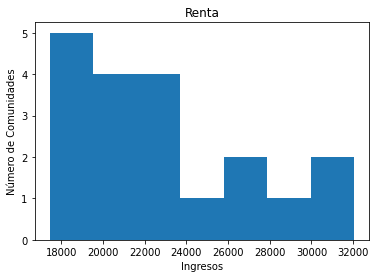

In [ ]:
# Para mostrar en el histograma los datos de ingresos hemos de indicar que queremos todas las filas de la primera columna
plt.hist(DatosMatriz[:,0],7 ) # recordar, columna 0 = primera variable y el 7 indica el número de grupos(columnas) a mostrar
#plt.hist(DatosMatriz[:,0]) # recordar, columna 0 = primera variable
plt.ylabel('Número de Comunidades')
plt.xlabel('Ingresos')
plt.title('Renta')
plt.show()

In [45]:
#Ejer 12: Filtrando los datos en el dataframe Datos, identificar las comunidades autónomas cuya renta
#      Apartado 1: Renta entre 26000€ y 28000€
#      Apartado 2: Renta superior a 30000€


In [46]:
Datos1 = Datos[(Datos['Renta'] >= 26000) & (Datos['Renta'] <= 28000)]
Datos1['Comunidad']

,Comunidad
1,ARAGON
8,CATALUNYA


In [47]:
Datos2 = Datos[(Datos['Renta'] > 30000)]
Datos2['Comunidad']

,Comunidad
12,MADRID
15,PAIS VASCO


¿Y si queremos visualizar la diferencia de ingresos?

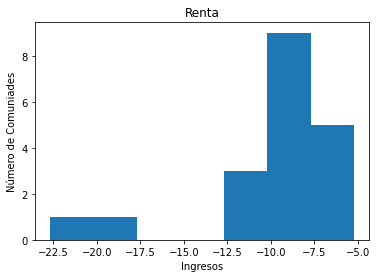

In [ ]:
plt.hist(DatosMatriz[:,1],7 ) # columna 1 = segunda variable
plt.ylabel('Número de Comuniades')
plt.xlabel('Ingresos')
plt.title('Renta')
plt.show()



# Vamos a analizar los datos de muestra de las comunidades autónomas para la Detección de **outliers**
Adaptación del cuaderno **Ejemplo 2.3 Outliers.ipynb**

In [ ]:
Ingresos=DatosMatriz[:,0] # Ingresos medios
datos=Ingresos # para reutilizar el código

**MÉTODO 1:**  Basado en la distribución normal

In [ ]:
# CRITERIO 1: PROBABILIDAD GLOBAL
# probabilidad de la muestra de estar dentro de las bandas
p_g=0.95
# probabilidad global de una cola
alfa_g=(1-p_g)/2
# probabilidad  de las colas para un solo dato
alfa= 1-(1-alfa_g)**(1/len(datos))
## CRITERIO 2:  Criterio Chauvenet
#alfa=1/(2*len(datos))
Z_alfa=st.norm.ppf(1-alfa/2)
# Impresión de resultados
alfa=round(alfa,5)
Z_alfa=round(Z_alfa,5)# k
print(f" Alfa ={alfa}")
print(f" CUANTIL Z_(1-alfa/2) ={Z_alfa}")

 Alfa =0.00133
 CUANTIL Z_(1-alfa/2) =3.20907


In [ ]:
xL=  round(np.mean(datos)-Z_alfa*  np.std(datos),4)
xU=  round(np.mean(datos)+Z_alfa*  np.std(datos),4)
print(f" Banda= [ {xL},{xU}]")

 Banda= [ 8608.4099,36982.9585]


In [ ]:
# No hay ninguna comunidad outlier respecto a los ingresos
for i in  range(len(datos)):
        if datos[i] < xL  or datos[i]>xU:
          print(f" El dato[{i}]={datos[i]} es un outlier")


**MÉTODO 2:**  Basado en la distancia entre cuartiles

In [ ]:
Q1 = np.quantile(datos,0.25)
Q3 = np.quantile(datos,0.75)
IQR = Q3 - Q1
k=1.5
xL=Q1 - k * IQR
xU=Q3 + k * IQR
outlier=np.array([]) # almacenamiento de las posiciones de los outliers
for i in  range(len(datos)):
        if datos[i] < xL  or datos[i]>xU:
          print(f" El dato[{i}]={datos[i]} es un outlier")
          outlier=np.concatenate((outlier,np.array([i])))

**¿Qué comunidades son?**

In [ ]:
Datos.loc[outlier,"Comunidad"]

Series([], Name: Comunidad, dtype: object)

# Aplicamos las técnicas de **escalameniento de datos** a la información que tenemos de las comunidades autónomas

Adaptación del cuaderno **Ejemplo 2.5 Escalamiento de datos.**ipynb

In [ ]:
Datos

,Comunidad,Renta,DiferenciaRenta
0,ANDALUCIA,17747,-9.1
1,ARAGON,26512,-7.8
2,ASTURIAS,21149,-9.0
3,BALEARS,22048,-22.7
4,CANARIAS,17448,-18.4
5,CANTABRIA,22096,-9.3
6,CASTILLA Y LEON,23167,-7.0
7,CASTILLA Y LA MANCHA,19369,-7.1
8,CATALUNYA,27812,-10.9
9,VALENCIA,20792,-9.9


In [ ]:
# Escalamiento
# ==============================================================================
# Selección de columnas numéricas tipo doble o enteras
numeric_cols = Datos.select_dtypes(include=['float64', 'int']).columns.to_list()
# Standard scaler
preprocessor_SS = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols)],remainder='passthrough')

# MinMaxScaler
preprocessor_MM = ColumnTransformer(
                   [('scale', MinMaxScaler(), numeric_cols)],remainder='passthrough')

Datos_prep_SS = preprocessor_SS.fit_transform(Datos)
Datos_prep_MM = preprocessor_MM.fit_transform(Datos)
# Nota:
# Se podría aplicar las transformaciones a cualquier conjunto de datos con
# Data_new_prep_SS  = preprocessor_SS.transform(Data_new)

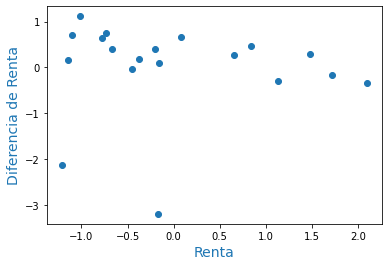

In [ ]:
# Representación de las dos variables escaladas z-score
fig, ax = plt.subplots()
ax.scatter(Datos_prep_SS[:,0], Datos_prep_SS[:,1])
ax.set_xlabel("Renta", fontdict = {'fontsize':14,  'color':'tab:blue'})
ax.set_ylabel("Diferencia de Renta",fontdict = {'fontsize':14,  'color':'tab:blue'})
plt.show()


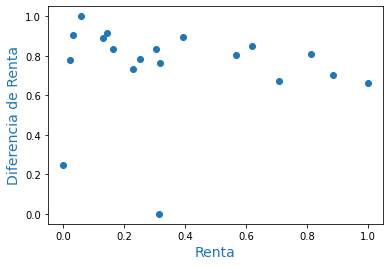

In [ ]:
# Representación de las variables escaladas Min-Max
fig, ax = plt.subplots()
ax.scatter(Datos_prep_MM[:,0], Datos_prep_MM[:,1])
ax.set_xlabel("Renta", fontdict = {'fontsize':14,  'color':'tab:blue'})
ax.set_ylabel("Diferencia de Renta",fontdict = {'fontsize':14,  'color':'tab:blue'})
plt.show()

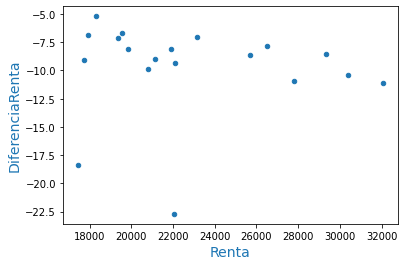

In [ ]:
# Dibujar los datos originales. Integración de matplotlib con pandas
# df.plot
fig, ax = plt.subplots()
ax.set_xlabel("Renta", fontdict = {'fontsize':14,  'color':'tab:blue'})
ax.set_ylabel("Diferencia de Renta",fontdict = {'fontsize':14,  'color':'tab:blue'})
Datos.plot(kind='scatter', x='Renta', y='DiferenciaRenta',ax=ax)